Colunas no arquivo histórico: ['mes/ano;consumo;data']

Primeiras linhas do arquivo histórico:
       mes/ano;consumo;data
0  201501;202594;2015-01-01
1  201502;197816;2015-02-01
2  201503;202908;2015-03-01
3  201504;185771;2015-04-01
4  201505;189212;2015-05-01


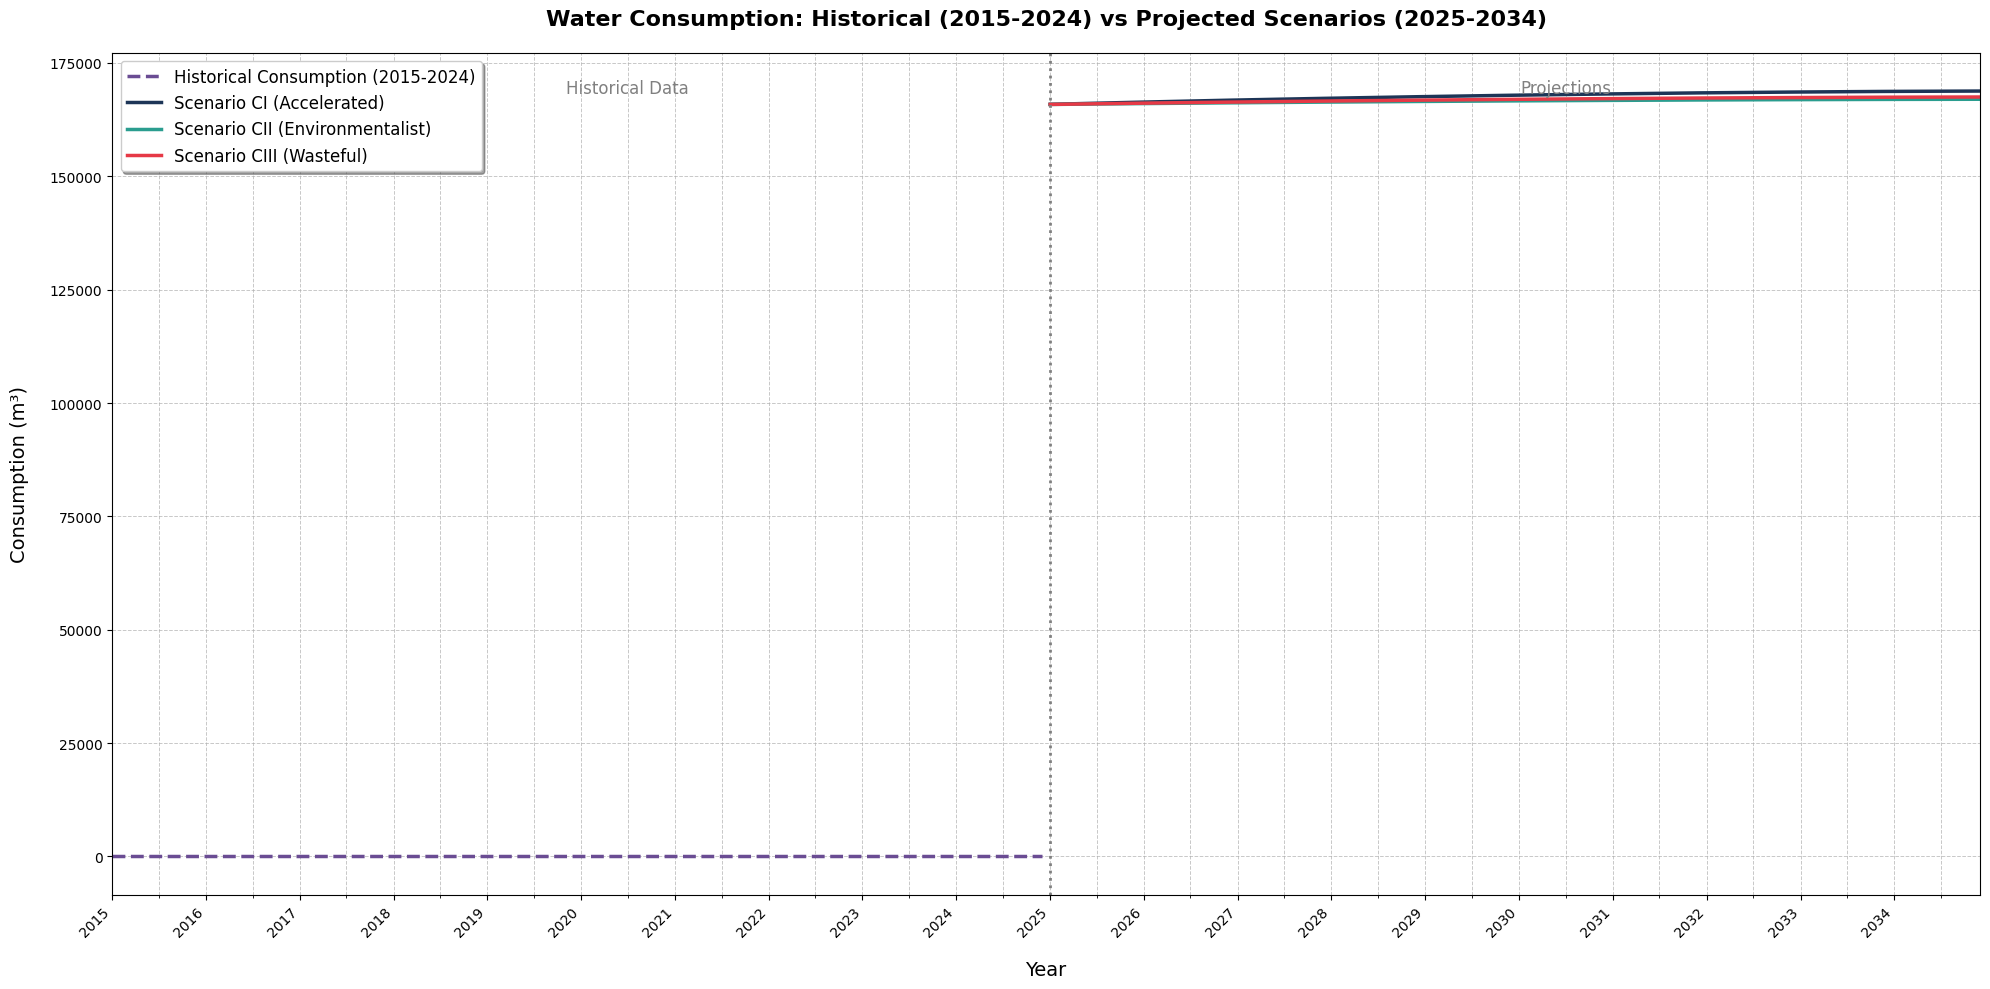

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import matplotlib.dates as mdates
import os

path = 'C:\\Users\\Edmilson\\Gama_Workspace2\\ABMS-WP'

# Load scenario data
scenario_file = os.path.join(path, 'resultados\\dados_simulacao2.csv')
df_scenarios = pd.read_csv(scenario_file)

# Rename columns for consistency
df_scenarios.columns = ['Month/Year', 'Scenario CI', 'Scenario CII', 'Scenario CIII']

# Convert Month/Year to datetime
df_scenarios['Date'] = pd.to_datetime(df_scenarios['Month/Year'], format='%m/%Y')

# Load historical consumption data
historical_file = os.path.join(path, 'includes\\Tabela_consumo_Itapua_120m_por_mes.csv')
df_historical = pd.read_csv(historical_file)

# Verificar as colunas existentes no arquivo histórico
print("Colunas no arquivo histórico:", df_historical.columns.tolist())

# Verificar as primeiras linhas para entender o formato
print("\nPrimeiras linhas do arquivo histórico:")
print(df_historical.head())

# Ajustar conforme o formato real do arquivo
# Se o arquivo tiver apenas uma coluna com datas no formato YYYYMM
if len(df_historical.columns) == 1:
    df_historical.columns = ['Month/Year']
    df_historical['Historical Consumption'] = df_historical['Month/Year'].str.extract('(\d+)$')[0].astype(float)
    df_historical['Month/Year'] = df_historical['Month/Year'].str.extract('^(\d{6})')[0]
    
# Converter para datetime
df_historical['Date'] = pd.to_datetime(df_historical['Month/Year'], format='%Y%m')

# Filter historical data to match the scenario period (2015-2024)
df_historical = df_historical[(df_historical['Date'] >= '2015-01-01') & 
                             (df_historical['Date'] <= '2024-12-31')]

# Configure the plot
plt.figure(figsize=(20, 10))

# Plot historical data (2015-2024)
plt.plot(df_historical['Date'], df_historical['Historical Consumption'], 
         label='Historical Consumption (2015-2024)', color='#6A4C93', linewidth=2.5, linestyle='--')

# Plot scenario projections (2025-2034)
plt.plot(df_scenarios['Date'], df_scenarios['Scenario CI'], 
         label='Scenario CI (Accelerated)', color='#1D3557', linewidth=2.5)
plt.plot(df_scenarios['Date'], df_scenarios['Scenario CII'], 
         label='Scenario CII (Environmentalist)', color='#2A9D8F', linewidth=2.5)
plt.plot(df_scenarios['Date'], df_scenarios['Scenario CIII'], 
         label='Scenario CIII (Wasteful)', color='#E63946', linewidth=2.5)

# X-axis settings
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())  # Major ticks for each year
ax.xaxis.set_minor_locator(MonthLocator(bymonth=[7]))  # Minor ticks for July of each year
ax.xaxis.set_major_formatter(DateFormatter('%Y'))  # Format showing only the year

# Add plot elements
plt.title('Water Consumption: Historical (2015-2024) vs Projected Scenarios (2025-2034)', 
         fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Year', fontsize=14, labelpad=15)
plt.ylabel('Consumption (m³)', fontsize=14, labelpad=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Improve legend
plt.legend(fontsize=12, framealpha=1, shadow=True)

# Adjust x-axis limits to show both historical and projected data
plt.xlim([pd.to_datetime('01/2015', format='%m/%Y'), 
          pd.to_datetime('12/2034', format='%m/%Y')])

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add vertical line to separate historical and projected data
plt.axvline(x=pd.to_datetime('01/2025', format='%m/%Y'), color='gray', linestyle=':', linewidth=2)
plt.text(pd.to_datetime('07/2020', format='%m/%Y'), plt.ylim()[1]*0.95, 
         'Historical Data', ha='center', fontsize=12, color='gray')
plt.text(pd.to_datetime('07/2030', format='%m/%Y'), plt.ylim()[1]*0.95, 
         'Projections', ha='center', fontsize=12, color='gray')

# Add final difference annotation (using scenario data only)
final_ci = df_scenarios['Scenario CI'].iloc[-1]
final_cii = df_scenarios['Scenario CII'].iloc[-1]
final_ciii = df_scenarios['Scenario CIII'].iloc[-1]

plt.annotate(f'Final difference CI-CII: {final_ci-final_cii:.2f} m³', 
             xy=(df_scenarios['Date'].iloc[-1], final_ci), 
             xytext=(10, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), fontsize=12)

plt.annotate(f'Final difference CI-CIII: {final_ci-final_ciii:.2f} m³', 
             xy=(df_scenarios['Date'].iloc[-1], final_ci), 
             xytext=(10, -30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
df.describe()

NameError: name 'df' is not defined

In [ ]:
df.head()

,Month/Year,Scenario CI,Scenario CII,Scenario CIII,Date
0,2025-01-01,165880.382972,165855.120100,165862.044962,2025-01-01
1,2025-02-01,165921.853068,165871.321008,165885.172463,2025-02-01
2,2025-03-01,165963.333531,165887.525967,165908.305746,2025-03-01
3,2025-04-01,166004.824364,165903.734976,165931.444813,2025-04-01
4,2025-05-01,166046.325570,165919.948038,165954.589664,2025-05-01
